In [1]:
import pandas as pd

df = pd.read_csv('sales_data_with_discounts.csv')

df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [18]:
# Mean
mean_values = df.mean(numeric_only=True)
print("Mean Values\n",mean_values)

# Median
median_values = df.median(numeric_only=True)
print("\nMedian Values\n",median_values)
# Mode
mode_values = df.mode(numeric_only=True).iloc[0]  # Taking the first mode if multiple
print("\nMedian Values\n",mode_values)
# Standard Deviation
std_values = df.std(numeric_only=True)
print("\nMedian Values\n",std_values)

Mean Values
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median Values
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Median Values
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Median Values
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


# Interpretation
Volume: The average sales volume is around 5.67 units. The mode and median are both 3, indicating most transactions involve small quantities.

Avg Price: Wide range observed (8100 to 55100), with a high standard deviation, meaning prices vary significantly across models.

Total Sales Value: Mean is skewed by a few high-volume or high-price entries, as seen by the median (112,700) being higher than the mean (105,344).

Discount Rate (%): Ranges from 5.55% to 18%, with an average around 10.65%. Lower standard deviation implies discounts are somewhat consistent.

Discount Amount: Varies widely due to dependency on sales value and discount rate. Mean is ~₹9903.

Net Sales Value: Average after-discount revenue per transaction is ~₹102,884, with moderate variability.



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)


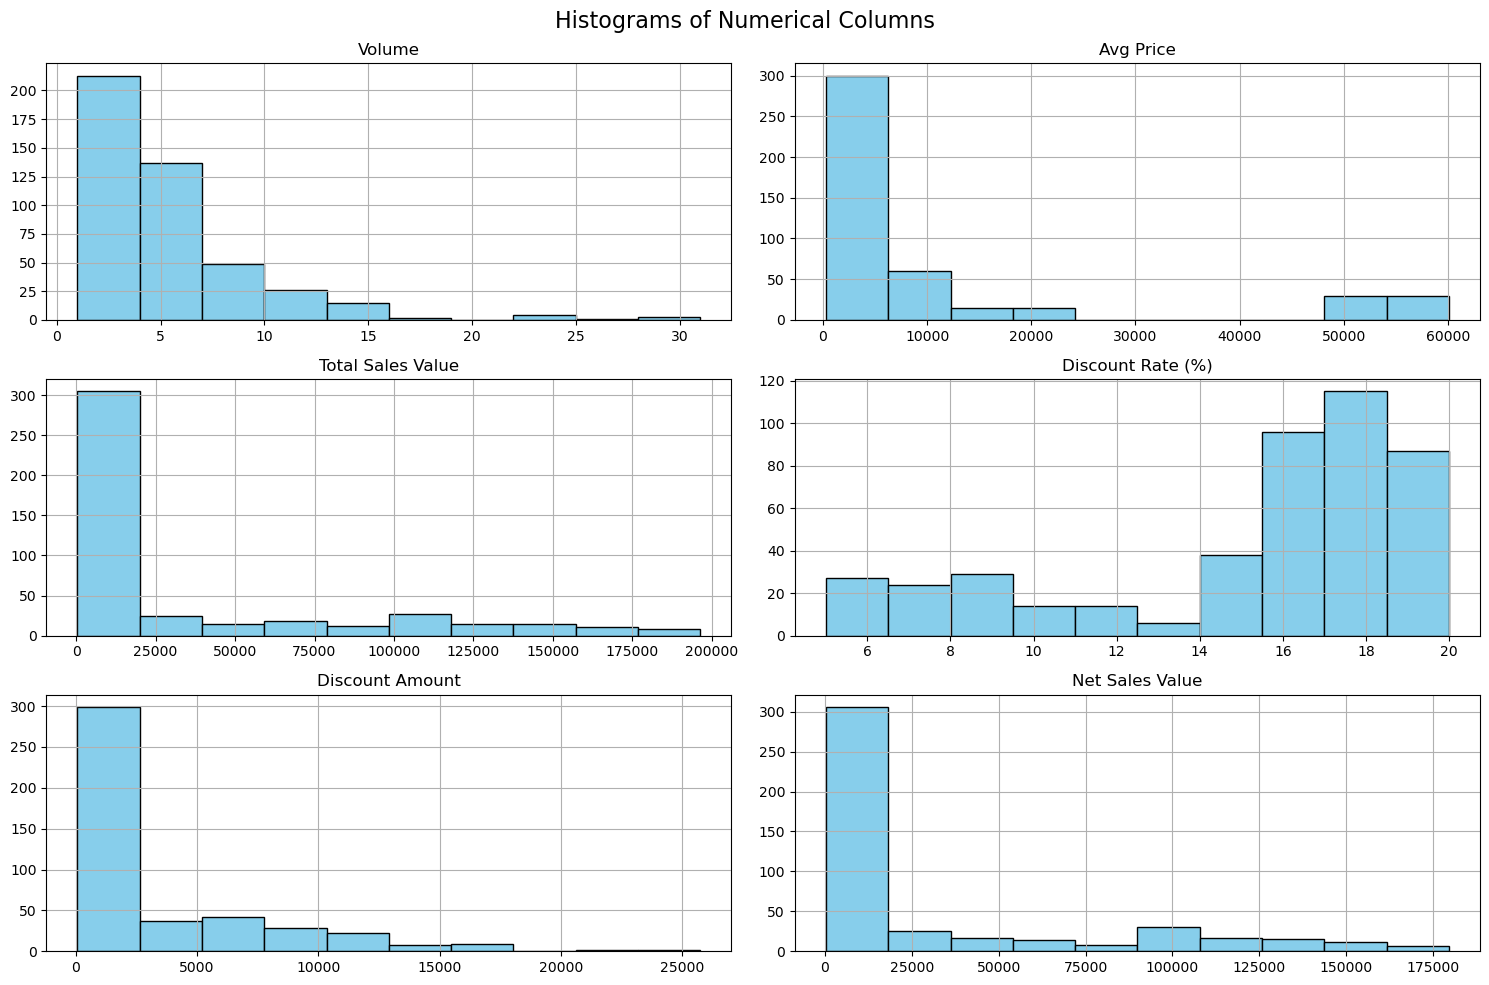

In [21]:
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Plot histograms
df[numerical_cols].hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()


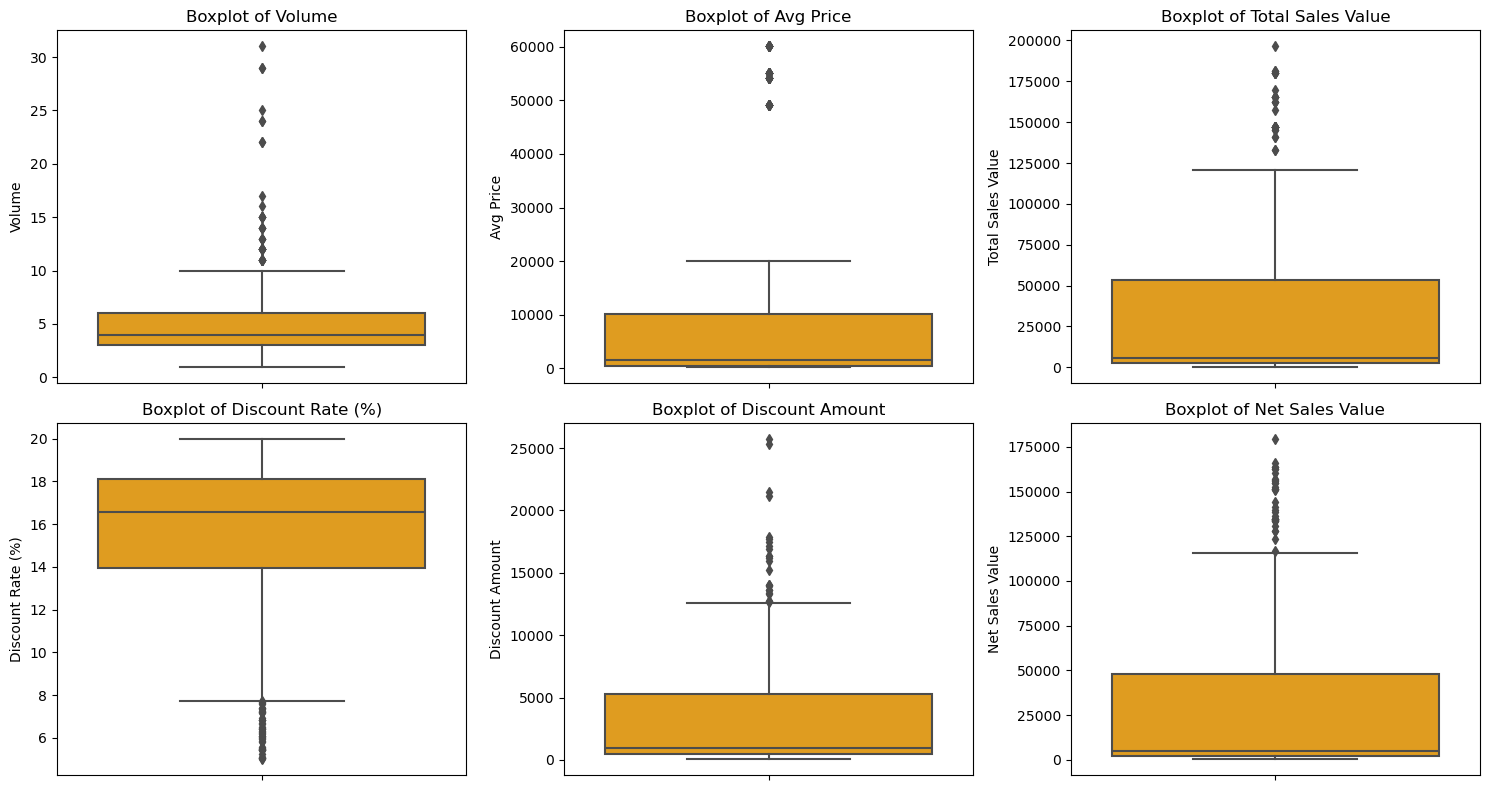

In [22]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


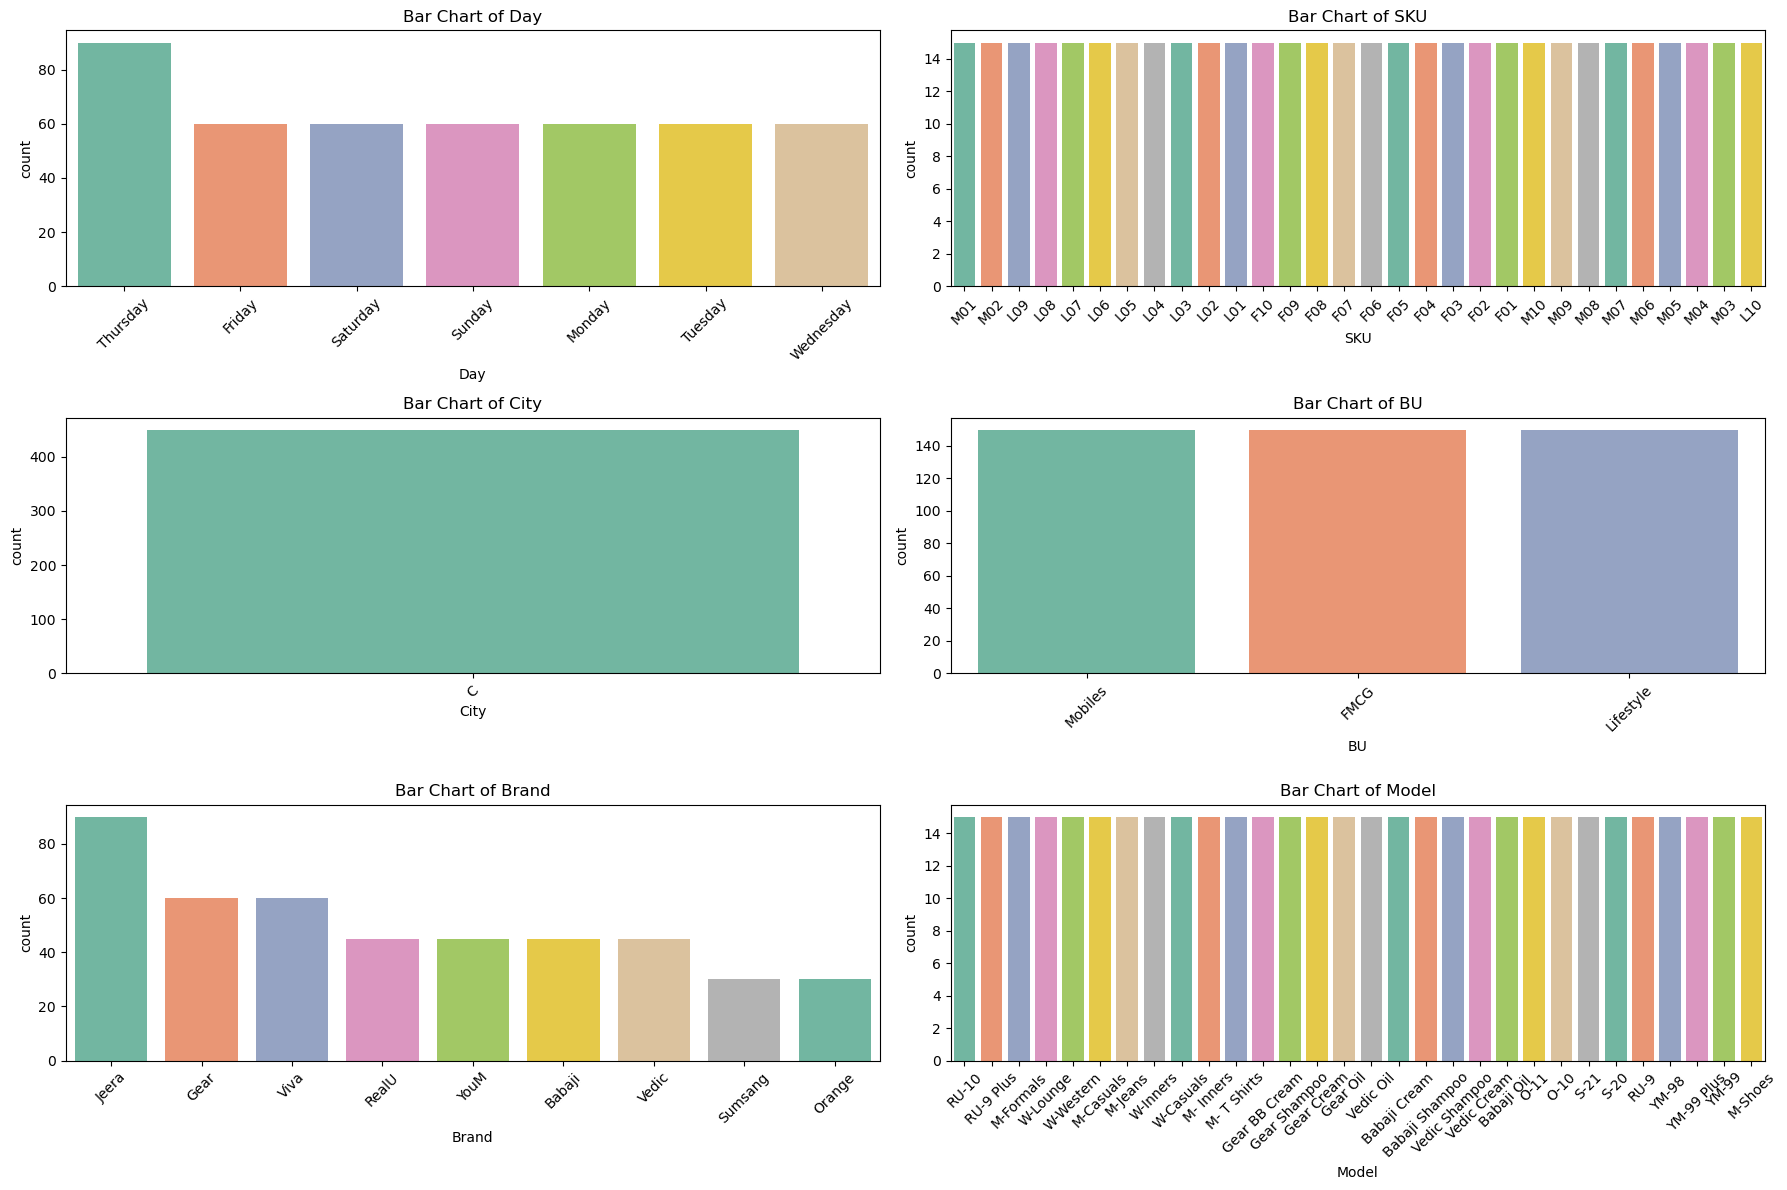

In [23]:
categorical_cols = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Bar Chart of {col}')
plt.tight_layout()
plt.show()


Original Data Summary:

       Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.00     450.00             450.00             450.00   
mean     5.07   10453.43           33812.84              15.16   
std      4.23   18079.90           50535.07               4.22   
min      1.00     290.00             400.00               5.01   
25%      3.00     465.00            2700.00              13.97   
50%      4.00    1450.00            5700.00              16.58   
75%      6.00   10100.00           53200.00              18.11   
max     31.00   60100.00          196400.00              19.99   

       Discount Amount  Net Sales Value  
count           450.00           450.00  
mean           3346.50         30466.34  
std            4509.90         46358.66  
min              69.18           326.97  
25%             460.46          2202.21  
50%             988.93          4677.79  
75%            5316.50         47847.91  
max           25738.02        179507.48  

St

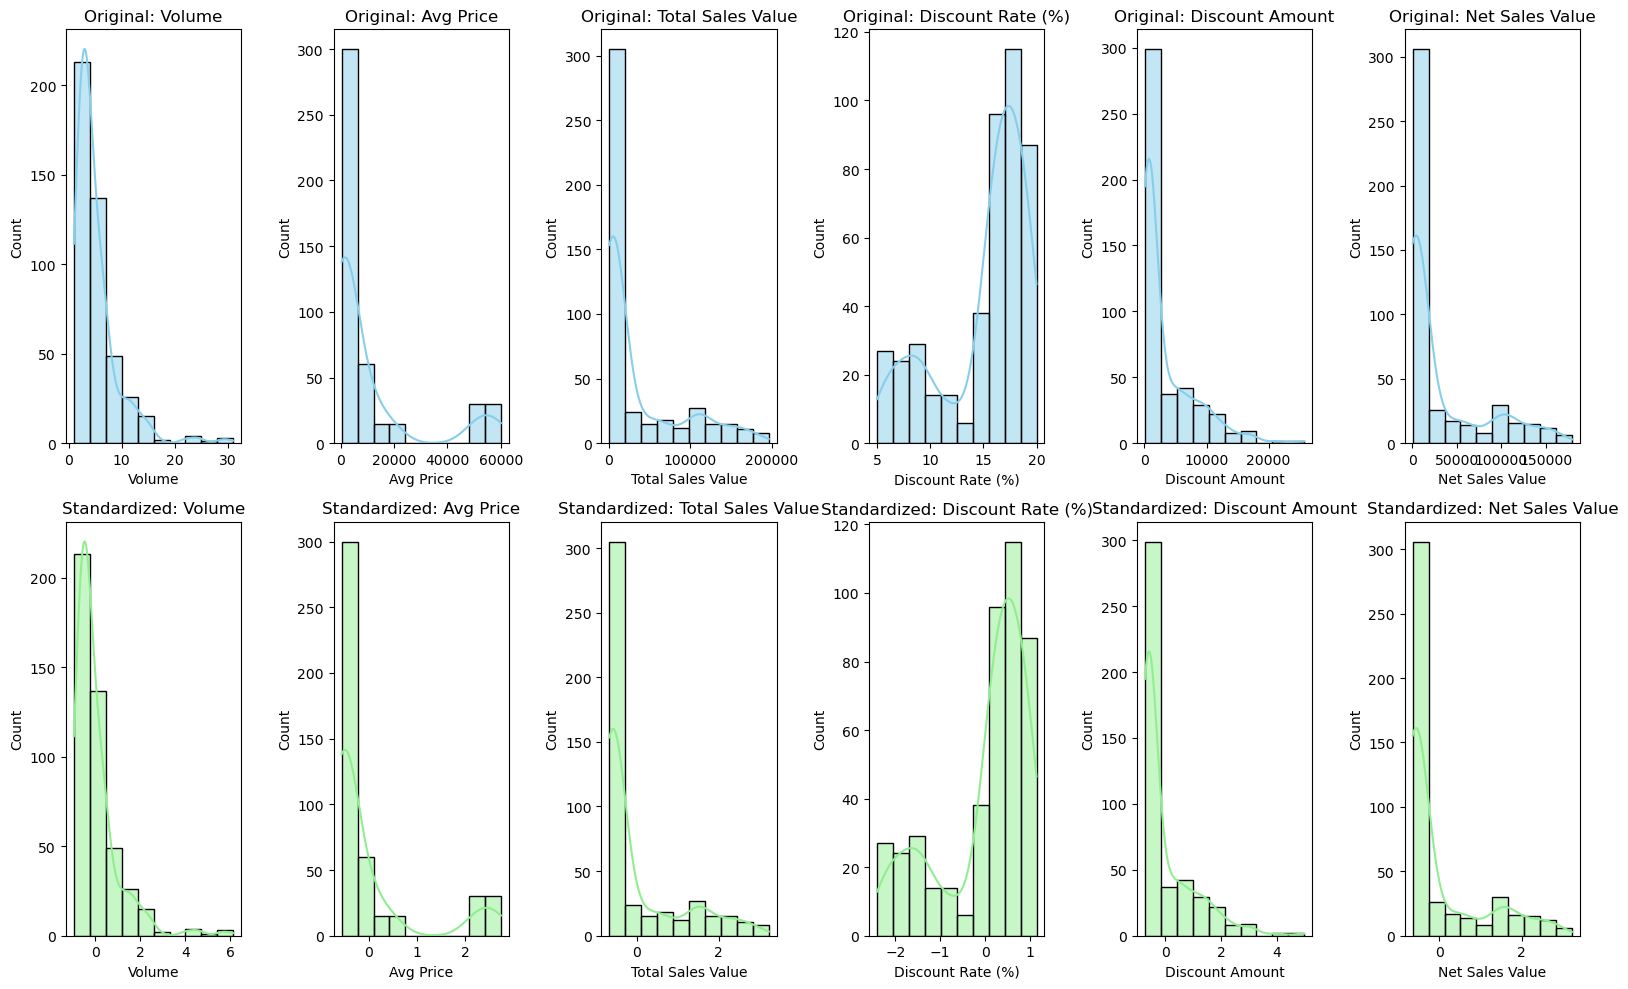

In [24]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

print("Original Data Summary:\n")
print(df[num_cols].describe())

# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

# standardized stats
print("\nStandardized Data Summary:\n")
print(df_standardized[num_cols].describe())

# Plot before and after histograms for comparison
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i + 1)
    sns.histplot(df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Original: {col}')
    
    plt.subplot(2, len(num_cols), i + 1 + len(num_cols))
    sns.histplot(df_standardized[col], bins=10, kde=True, color='lightgreen')
    plt.title(f'Standardized: {col}')

plt.tight_layout()
plt.show()


In [25]:
# Identify categorical columns
cat_cols = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# One-Hot Encoding using pandas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

# Display a sample of the encoded dataframe
df_encoded.head()


,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,15,12100,181500,11.65,21153.50,160346.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,10,10100,101000,11.56,11676.10,89323.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,7,16100,112700,9.46,10657.91,102042.09,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,6,20100,120600,6.94,8364.07,112235.93,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,3,8100,24300,18.00,4372.95,19927.05,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Conclusion
Descriptive Analytics showed that most transactions involve low volumes and consistent discounts (~10.65%), but prices and sales values vary widely.

Visualizations (histograms, boxplots, bar charts) revealed skewed distributions, outliers, and top-performing product categories and cities.

Standardization ensures all numerical features are on the same scale, improving model performance.

One-hot encoding transforms categorical data into numeric form, making it usable by ML algorithms.